# Credit Card Lead Pred

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Credit_Card_Lead_Pred/train_s3TEQDk.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Credit_Card_Lead_Pred/test_mSzZ8RL.csv")
submission_df = pd.read_csv("/content/drive/MyDrive/ML_Projects/Credit_Card_Lead_Pred/sample_submission_eyYijxG.csv")

In [4]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
submission_df.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


# shape of the train and test data

In [7]:
print(train_df.shape)
print(test_df.shape)

(245725, 11)
(105312, 10)


# Difference in the coloumns of train and test dataframe

In [8]:
print((train_df.columns).difference(test_df.columns))

Index(['Is_Lead'], dtype='object')


# Checking for the null values using graph

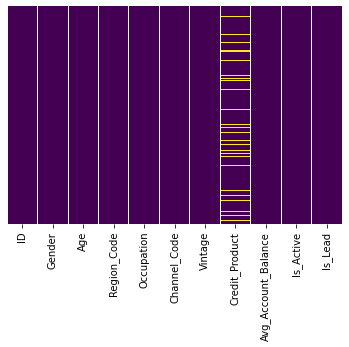

In [9]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Droping the null values row wise

In [10]:
train_df = train_df.dropna()

# Setting IT as index of the train Dataframe

In [11]:
train_df.set_index('ID',inplace=True)

In [12]:
train_df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Getting Dummy variables for the categorical values present in the train Dataframe

In [13]:
train_df=pd.get_dummies(train_df, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

# Counting of Label class

In [14]:
train_df['Is_Lead'].value_counts()

0    183087
1     33313
Name: Is_Lead, dtype: int64

# Plotting Label class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


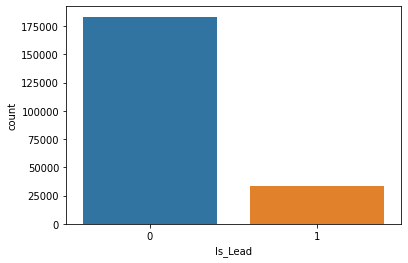

In [15]:
sns.countplot(train_df['Is_Lead'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


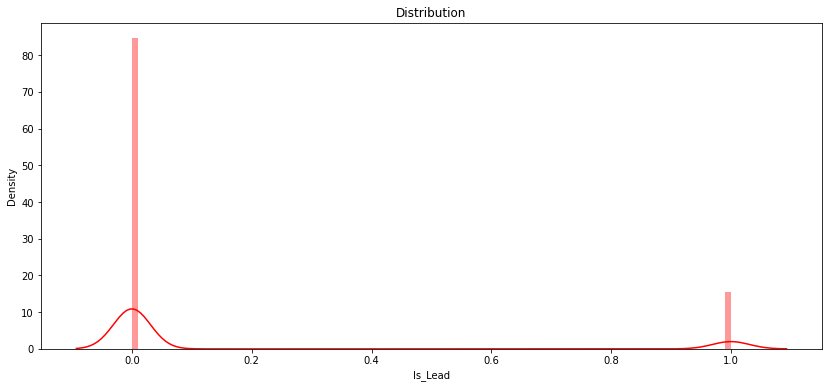

In [16]:
plt.figure(figsize=(14,6))
sns.distplot(train_df['Is_Lead'],bins=100,color='r')
plt.title('Distribution')
plt.show()

# From the above two graphs we can conclude that our dataset is imbalanced but have a normal distribution

# Splitting the train Dataframe into train and test

In [17]:
y=train_df['Is_Lead']
x=train_df.drop('Is_Lead',axis=1)
x.shape

(216400, 52)

# Work on test dataframe

In [18]:
test_df=pd.get_dummies(test_df, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

test_df.set_index('ID',inplace=True)
x_test_final=test_df[:]
x_test_final.shape

(105312, 52)

In [19]:
test_df.head()


,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
ID,,,,,,,,,,,,,,,,,,,,,
VBENBARO,29,25,742366,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
CCMEWNKY,43,49,925537,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
VK3KGA9M,31,14,215949,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
TT8RPZVC,29,33,868070,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
SHQZEYTZ,29,19,657087,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


# Random Forest

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [21]:
from collections import Counter
Counter(y_train)

Counter({0: 146444, 1: 26676})

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier().fit(x_train, y_train)
rand_y_pred = rand_clf.predict(x_test)

In [23]:
rand_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
print(accuracy_score(y_test, rand_y_pred))
print(classification_report(y_test, rand_y_pred))
print(confusion_matrix(y_test, rand_y_pred))

0.8490526802218115
              precision    recall  f1-score   support

           0       0.88      0.96      0.91     36643
           1       0.52      0.25      0.34      6637

    accuracy                           0.85     43280
   macro avg       0.70      0.60      0.63     43280
weighted avg       0.82      0.85      0.83     43280

[[35085  1558]
 [ 4975  1662]]


# Random Forest 0.8490526802218115